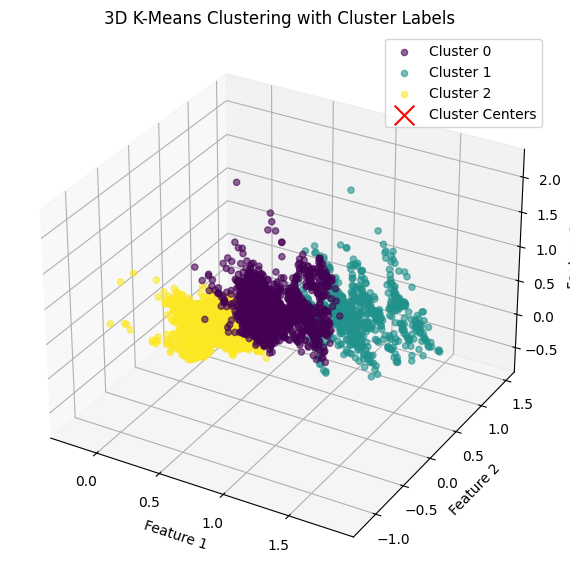
顏色對照

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [85]:
# 讀取 CSV 檔案
file_path = "../1.資料前處理/merged_stocks_sorted.csv"
df = pd.read_csv(file_path)
#print(df.head())
# 假設我們要使用數值型的列來做 Autoencoder
#df = df.select_dtypes(include=[np.number]).dropna()

print(df.head())

           日期        成交股數           成交金額    開盤價    最高價    最低價    收盤價   漲跌價差  \
0  2010-10-21  20,697,571  2,347,730,094  114.0  114.5  112.5  113.0  -1.00   
1  2010-10-21  40,237,461  2,458,712,121   61.3   61.4   60.8   61.0   0.00   
2  2010-10-21   9,435,865  3,675,093,620  394.0  395.0  386.0  387.0  -5.50   
3  2010-10-22  16,111,879  1,833,691,206  114.5  114.5  113.0  114.0  +1.00   
4  2010-10-22  42,971,490  2,646,457,386   61.7   61.8   61.4   61.8  +0.80   

    成交筆數   SMA_5  ...   SMA_200       EMA_5      EMA_20        RSI       MACD  \
0  9,188  113.60  ...  129.9400  113.598253  115.156901  42.888466  -1.067839   
1  7,376   61.02  ...   60.9100   61.022536   61.126968  49.448148   0.078879   
2  6,346  385.20  ...  496.8100  389.029298  412.053709  32.870088 -18.545872   
3  6,509  113.20  ...  129.7525  113.732169  115.046720  45.751457  -1.032347   
4  9,208   61.00  ...   60.8945   61.281691   61.191067  55.601780   0.124750   

   MACD_signal  MACD_hist  Support_Lev

In [86]:
# 讀取 CSV 檔案
file_path = "clustered_encoded_data.csv"
df_reduce_dim= pd.read_csv(file_path)
#print(df.head())
# 假設我們要使用數值型的列來做 Autoencoder
#df = df.select_dtypes(include=[np.number]).dropna()

print(df_reduce_dim.head())

   Feature1  Feature2  Feature3  Cluster
0  0.292578 -0.115719  0.246620        2
1  0.236450 -0.239347  0.170941        2
2  0.528171  0.303397  0.305406        0
3  0.309025 -0.134771  0.225585        2
4  0.258883 -0.293196  0.152621        2


In [87]:
df_draw=df[['日期','收盤價','股票代碼']]
print(df_draw.head())

           日期    收盤價  股票代碼
0  2010-10-21  113.0  2317
1  2010-10-21   61.0  2330
2  2010-10-21  387.0  2454
3  2010-10-22  114.0  2317
4  2010-10-22   61.8  2330


In [88]:
from sklearn.preprocessing import MinMaxScaler

# 初始化 MinMaxScaler
scaler = MinMaxScaler()

# 對 '收盤價' 欄位進行標準化
df_draw['收盤價_標準化'] = scaler.fit_transform(df_draw[['收盤價']])

# 顯示結果
print(df_draw.head())


           日期    收盤價  股票代碼   收盤價_標準化
0  2010-10-21  113.0  2317  0.036136
1  2010-10-21   61.0  2330  0.000000
2  2010-10-21  387.0  2454  0.226546
3  2010-10-22  114.0  2317  0.036831
4  2010-10-22   61.8  2330  0.000556


/tmp/ipykernel_164553/1099071940.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_draw['收盤價_標準化'] = scaler.fit_transform(df_draw[['收盤價']])


In [89]:
df_draw['Cluster'] = df_reduce_dim['Cluster'].values

/tmp/ipykernel_164553/2342447079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_draw['Cluster'] = df_reduce_dim['Cluster'].values


In [90]:
print(df_draw.head())

           日期    收盤價  股票代碼   收盤價_標準化  Cluster
0  2010-10-21  113.0  2317  0.036136        2
1  2010-10-21   61.0  2330  0.000000        2
2  2010-10-21  387.0  2454  0.226546        0
3  2010-10-22  114.0  2317  0.036831        2
4  2010-10-22   61.8  2330  0.000556        2


In [91]:
df_2317 = df_draw[df_draw['股票代碼'] == 2317]
df_2330 = df_draw[df_draw['股票代碼'] == 2330]
df_2454 = df_draw[df_draw['股票代碼'] == 2454]

print(df_2317.head())  # 顯示 2317 的數據
print(df_2330.head())  # 顯示 2330 的數據
print(df_2454.head())  # 顯示 2454 的數據


            日期    收盤價  股票代碼   收盤價_標準化  Cluster
0   2010-10-21  113.0  2317  0.036136        2
3   2010-10-22  114.0  2317  0.036831        2
6   2010-10-25  118.5  2317  0.039958        2
9   2010-10-26  118.0  2317  0.039611        2
12  2010-10-27  116.0  2317  0.038221        2
            日期   收盤價  股票代碼   收盤價_標準化  Cluster
1   2010-10-21  61.0  2330  0.000000        2
4   2010-10-22  61.8  2330  0.000556        2
7   2010-10-25  62.0  2330  0.000695        2
10  2010-10-26  62.3  2330  0.000903        2
13  2010-10-27  62.0  2330  0.000695        2
            日期    收盤價  股票代碼   收盤價_標準化  Cluster
2   2010-10-21  387.0  2454  0.226546        0
5   2010-10-22  387.0  2454  0.226546        0
8   2010-10-25  395.0  2454  0.232106        0
11  2010-10-26  393.0  2454  0.230716        0
14  2010-10-27  383.0  2454  0.223767        0


In [92]:
# 轉換日期
df_2317["日期"] = pd.to_datetime(df_2317["日期"])
df_2317 = df_2317.sort_values(by=["日期"]).reset_index(drop=True)

print(df_2317.head())  # 顯示 2317 的數據


# 轉換日期
df_2330["日期"] = pd.to_datetime(df_2330["日期"])
df_2330 = df_2330.sort_values(by=["日期"]).reset_index(drop=True)

print(df_2330.head())  # 顯示 2330 的數據



# 轉換日期
df_2454["日期"] = pd.to_datetime(df_2454["日期"])
df_2454 = df_2454.sort_values(by=["日期"]).reset_index(drop=True)

print(df_2454.head())  # 顯示 2454 的數據



          日期    收盤價  股票代碼   收盤價_標準化  Cluster
0 2010-10-21  113.0  2317  0.036136        2
1 2010-10-22  114.0  2317  0.036831        2
2 2010-10-25  118.5  2317  0.039958        2
3 2010-10-26  118.0  2317  0.039611        2
4 2010-10-27  116.0  2317  0.038221        2
          日期   收盤價  股票代碼   收盤價_標準化  Cluster
0 2010-10-21  61.0  2330  0.000000        2
1 2010-10-22  61.8  2330  0.000556        2
2 2010-10-25  62.0  2330  0.000695        2
3 2010-10-26  62.3  2330  0.000903        2
4 2010-10-27  62.0  2330  0.000695        2
          日期    收盤價  股票代碼   收盤價_標準化  Cluster
0 2010-10-21  387.0  2454  0.226546        0
1 2010-10-22  387.0  2454  0.226546        0
2 2010-10-25  395.0  2454  0.232106        0
3 2010-10-26  393.0  2454  0.230716        0
4 2010-10-27  383.0  2454  0.223767        0


/tmp/ipykernel_164553/1723526106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2317["日期"] = pd.to_datetime(df_2317["日期"])
/tmp/ipykernel_164553/1723526106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2330["日期"] = pd.to_datetime(df_2330["日期"])
/tmp/ipykernel_164553/1723526106.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [93]:
df_2317 = df_2317.drop(columns=['日期','收盤價','股票代碼'])
print(df_2317.head())  # 顯示 2317 的數據
print(df_2317['Cluster'].unique())
df_2330 = df_2330.drop(columns=['日期','收盤價','股票代碼'])
print(df_2330.head())  # 顯示 2330 的數據
print(df_2330['Cluster'].unique())
df_2454 = df_2454.drop(columns=['日期','收盤價','股票代碼'])
print(df_2454.head())  # 顯示 2454 的數據
print(df_2454['Cluster'].unique())

    收盤價_標準化  Cluster
0  0.036136        2
1  0.036831        2
2  0.039958        2
3  0.039611        2
4  0.038221        2
[2]
    收盤價_標準化  Cluster
0  0.000000        2
1  0.000556        2
2  0.000695        2
3  0.000903        2
4  0.000695        2
[2 0 1]
    收盤價_標準化  Cluster
0  0.226546        0
1  0.226546        0
2  0.232106        0
3  0.230716        0
4  0.223767        0
[0 2 1]


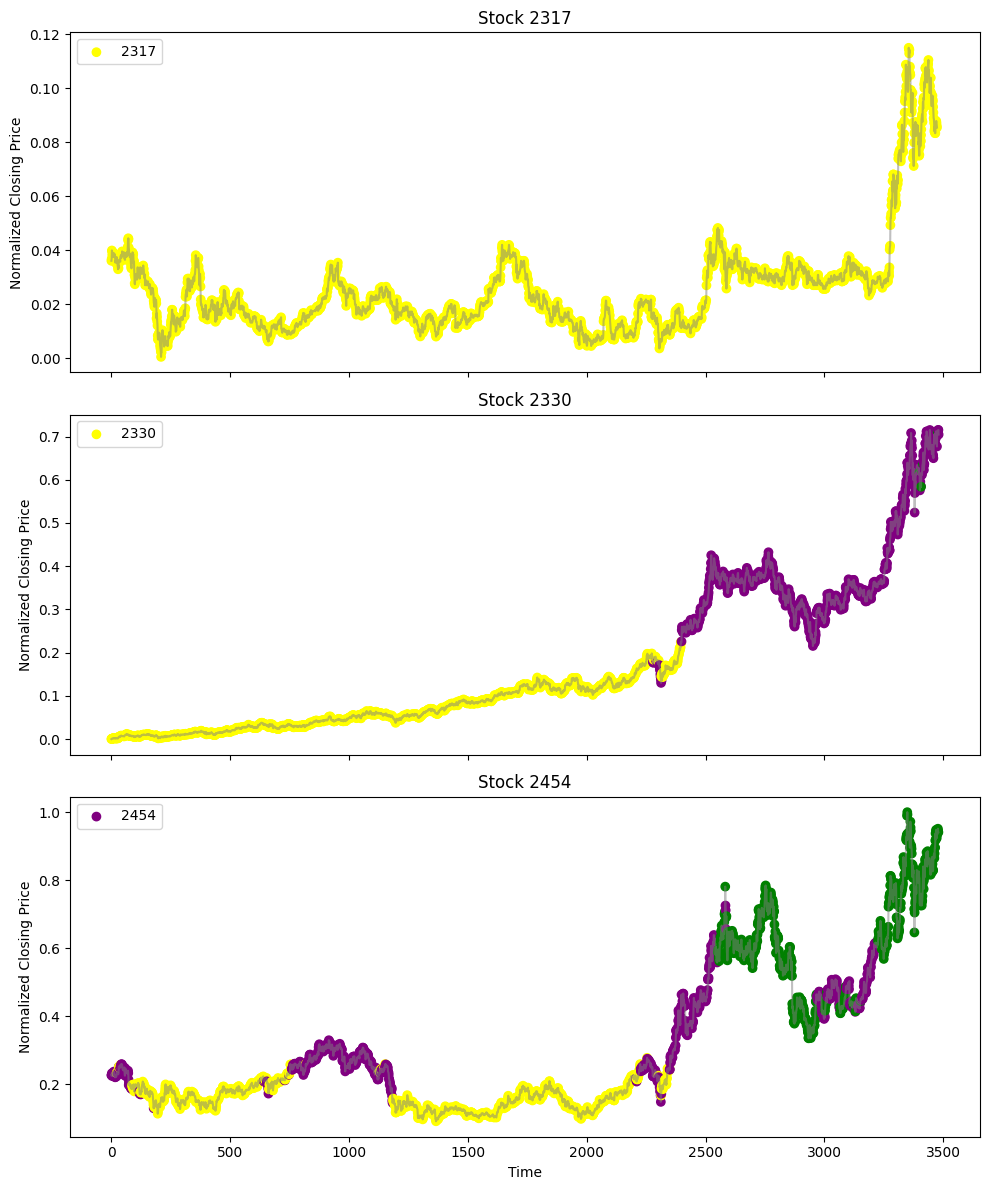

In [96]:

import matplotlib.pyplot as plt

# 定義顏色對應
cluster_colors = {0: 'purple', 1: 'green', 2: 'yellow'}

# 創建畫布
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# 繪製 df_2317
axes[0].scatter(df_2317.index, df_2317['收盤價_標準化'], 
                c=df_2317['Cluster'].map(cluster_colors), label="2317")
axes[0].plot(df_2317.index, df_2317['收盤價_標準化'], linestyle='-', alpha=0.5, color='gray')
axes[0].set_title('Stock 2317')

# 繪製 df_2330
axes[1].scatter(df_2330.index, df_2330['收盤價_標準化'], 
                c=df_2330['Cluster'].map(cluster_colors), label="2330")
axes[1].plot(df_2330.index, df_2330['收盤價_標準化'], linestyle='-', alpha=0.5, color='gray')
axes[1].set_title('Stock 2330')

# 繪製 df_2454
axes[2].scatter(df_2454.index, df_2454['收盤價_標準化'], 
                c=df_2454['Cluster'].map(cluster_colors), label="2454")
axes[2].plot(df_2454.index, df_2454['收盤價_標準化'], linestyle='-', alpha=0.5, color='gray')
axes[2].set_title('Stock 2454')

# 添加標籤
for ax in axes:
    ax.set_ylabel('Normalized Closing Price')
    ax.legend()
    
axes[-1].set_xlabel('Time')

plt.tight_layout()
plt.show()


,收盤價_標準化,Cluster
count,3482.000000,3482.000000
mean,0.168622,1.369902
std,0.166584,0.928276
min,0.000000,0.000000
25%,0.041001,0.000000
50%,0.110493,2.000000
75%,0.303683,2.000000
max,0.715080,2.000000
